# Análisis de Datos de Bolsa de Valores
## Diagrama de Dispersión: Volumen vs Precio

En este notebook vamos a:
1. Obtener datos reales de acciones usando Yahoo Finance
2. Analizar la relación entre volumen de transacciones y precio
3. Crear visualizaciones interactivas

In [1]:
# Importar librerías necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Obtener Datos de Yahoo Finance

Vamos a descargar datos históricos de Apple (AAPL) de los últimos 6 meses.

In [8]:
# Definir el ticker de la empresa (Apple en este caso)
ticker = "AAPL"

# Descargar datos de los últimos 6 meses
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=180)

# Obtener datos históricos
datos = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False)

# Aplanar el MultiIndex si existe (cuando se descarga un solo ticker)
if isinstance(datos.columns, pd.MultiIndex):
    datos.columns = datos.columns.droplevel(1)

# Mostrar información básica
print(f"Datos descargados de {ticker}")
print(f"Período: {fecha_inicio.date()} a {fecha_fin.date()}")
print(f"Total de registros: {len(datos)}")
print("\nPrimeras filas:")
datos.head()

C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_30500\578753974.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False)


Datos descargados de AAPL
Período: 2025-04-28 a 2025-10-25
Total de registros: 126

Primeras filas:


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-04-28,209.626892,210.983572,206.953443,209.487235,38743100
2025-04-29,210.694275,211.721759,207.861198,208.180424,36827600
2025-04-30,211.981125,213.058490,206.165359,208.788942,52286500
2025-05-01,212.799133,214.036096,208.389912,208.569481,57365700
2025-05-02,204.848587,206.484582,201.666374,205.586770,101010600


## 2. Exploración de Datos

In [3]:
# Información general del dataset
print("Información del dataset:")
print(datos.info())
print("\n" + "="*50)
print("\nEstadísticas descriptivas:")
print(datos.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2025-04-28 to 2025-10-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   126 non-null    float64
 1   (High, AAPL)    126 non-null    float64
 2   (Low, AAPL)     126 non-null    float64
 3   (Open, AAPL)    126 non-null    float64
 4   (Volume, AAPL)  126 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


Estadísticas descriptivas:
Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   126.000000  126.000000  126.000000  126.000000  1.260000e+02
mean    221.903690  223.985337  219.694302  221.793183  5.389756e+07
std      20.714570   20.629350   20.436593   20.493652  1.996284e+07
min     195.048645  197.346030  192.778123  193.450453  3.062120e+07
25%     203.059547  206.564758  201.505

## 3. Diagrama de Dispersión: Volumen vs Precio de Cierre

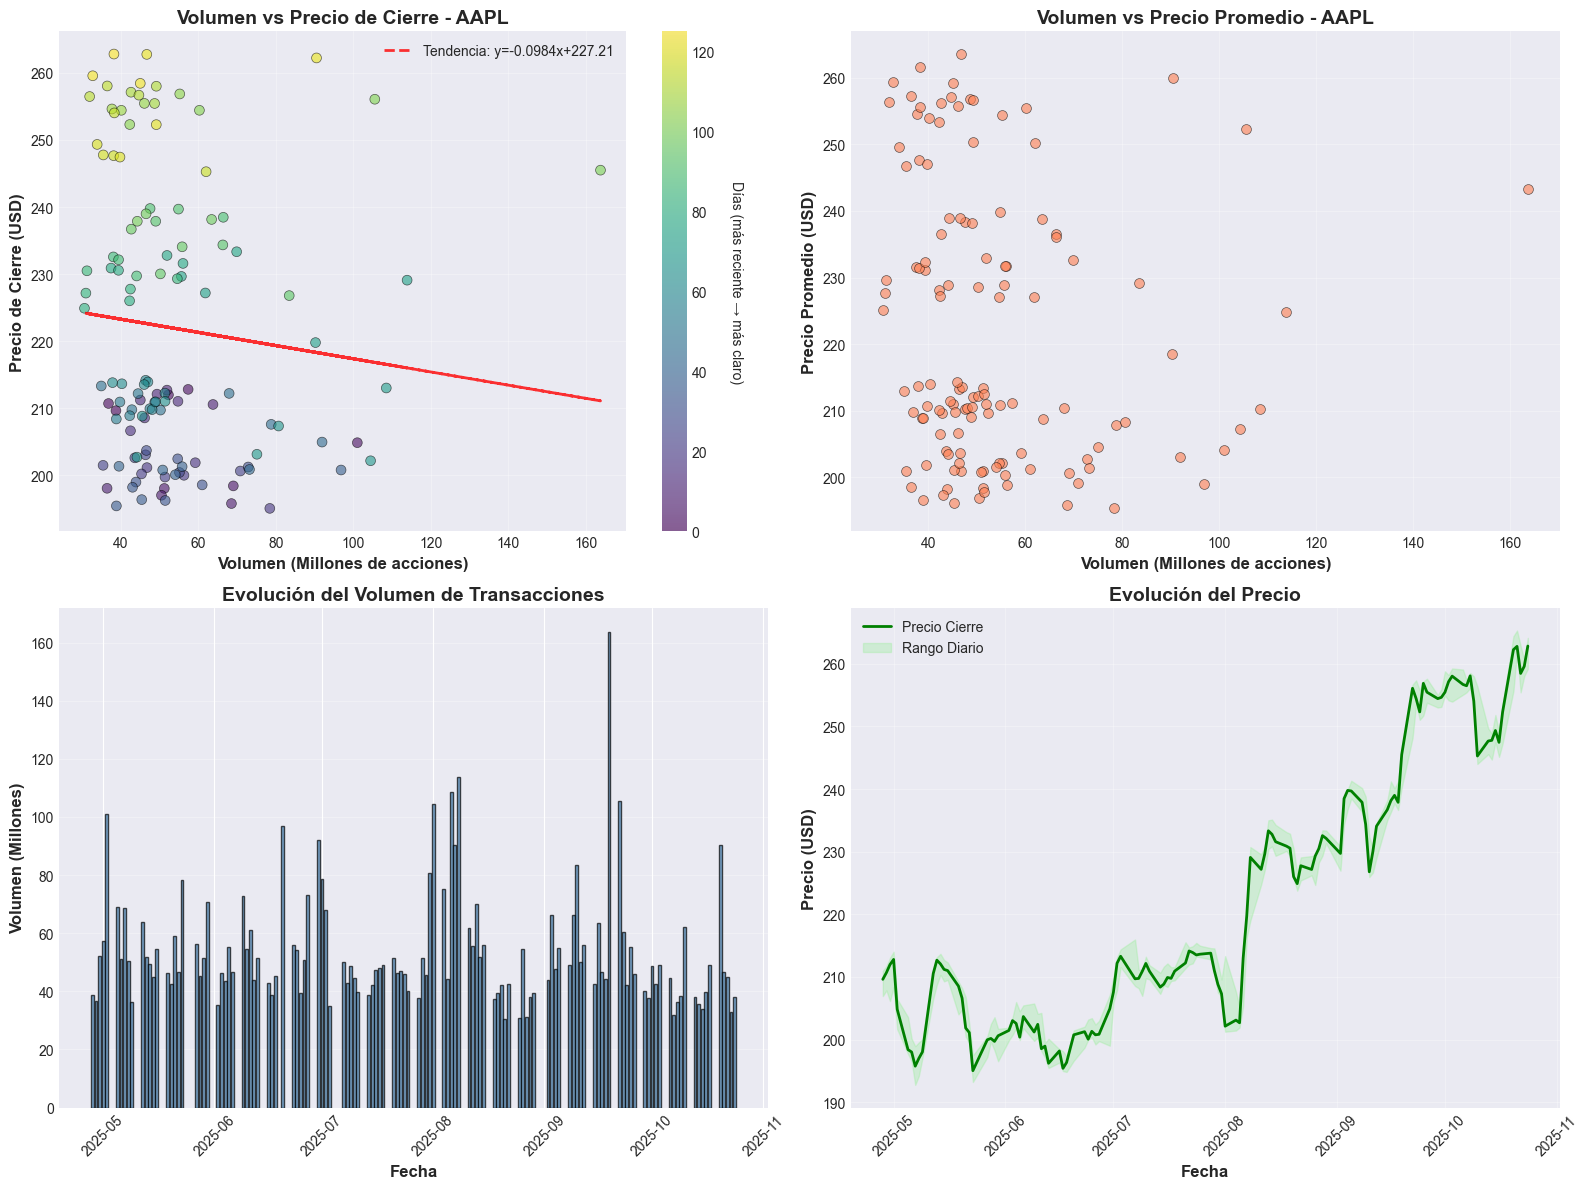

In [ ]:
# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Dispersión Volumen vs Precio de Cierre
ax1 = axes[0, 0]
scatter = ax1.scatter(datos['Volume']/1e6, datos['Close'], 
                     alpha=0.6, c=range(len(datos)), 
                     cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Volumen (Millones de acciones)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio de Cierre (USD)', fontsize=12, fontweight='bold')
ax1.set_title(f'Volumen vs Precio de Cierre - {ticker}', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter, ax=ax1)
cbar1.set_label('Días (más reciente → más claro)', rotation=270, labelpad=20)

# Añadir línea de tendencia
z = np.polyfit(datos['Volume']/1e6, datos['Close'], 1)
p = np.poly1d(z)
ax1.plot(datos['Volume']/1e6, p(datos['Volume']/1e6), 
         "r--", alpha=0.8, linewidth=2, label=f'Tendencia: y={z[0]:.4f}x+{z[1]:.2f}')
ax1.legend()

# 2. Dispersión Volumen vs Precio Promedio
ax2 = axes[0, 1]
datos['Precio_Promedio'] = (datos['High'] + datos['Low']) / 2
ax2.scatter(datos['Volume']/1e6, datos['Precio_Promedio'], 
           alpha=0.6, color='coral', s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Volumen (Millones de acciones)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Precio Promedio (USD)', fontsize=12, fontweight='bold')
ax2.set_title(f'Volumen vs Precio Promedio - {ticker}', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Volumen en el tiempo
ax3 = axes[1, 0]
ax3.bar(range(len(datos)), datos['Volume']/1e6, alpha=0.7, color='steelblue', edgecolor='black')
ax3.set_xlabel('Días', fontsize=12, fontweight='bold')
ax3.set_ylabel('Volumen (Millones)', fontsize=12, fontweight='bold')
ax3.set_title('Evolución del Volumen de Transacciones', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Precio en el tiempo
ax4 = axes[1, 1]
ax4.plot(datos.index, datos['Close'], linewidth=2, color='green', label='Precio Cierre')
ax4.fill_between(datos.index, datos['Low'], datos['High'], alpha=0.3, color='lightgreen', label='Rango Diario')
ax4.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax4.set_ylabel('Precio (USD)', fontsize=12, fontweight='bold')
ax4.set_title('Evolución del Precio', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Análisis de Correlación

Correlación entre Volumen y Precio de Cierre: -0.0949

Interpretación:
→ Correlación débil: El volumen tiene poca relación con el precio


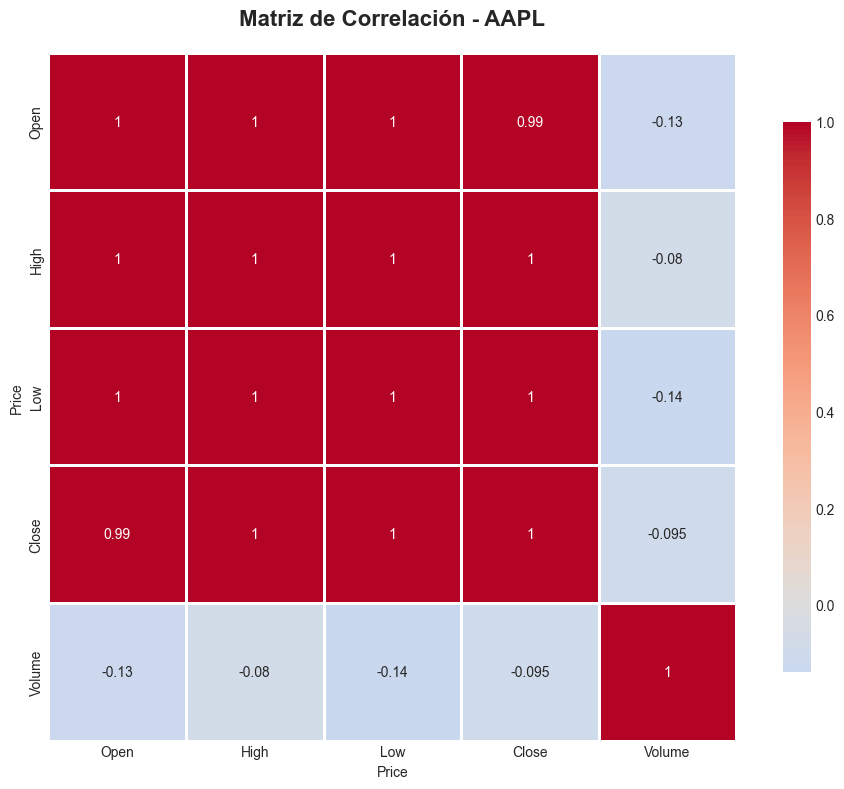

In [9]:
# Calcular correlación entre volumen y precio (usando Series, no DataFrame)
correlacion = datos['Volume'].corr(datos['Close'])

print(f"Correlación entre Volumen y Precio de Cierre: {correlacion:.4f}")
print("\nInterpretación:")
if abs(correlacion) < 0.3:
    print("→ Correlación débil: El volumen tiene poca relación con el precio")
elif abs(correlacion) < 0.7:
    print("→ Correlación moderada: Existe cierta relación entre volumen y precio")
else:
    print("→ Correlación fuerte: El volumen está muy relacionado con el precio")

# Matriz de correlación
columnas_interes = ['Open', 'High', 'Low', 'Close', 'Volume']
matriz_corr = datos[columnas_interes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(f'Matriz de Correlación - {ticker}', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5. Análisis Adicional: Días de Alto Volumen

Días con volumen superior a la media + 1 desviación estándar:
Total de días: 15

Top 5 días con mayor volumen:
Price             Open       Close     Volume  Cambio_Precio
Date                                                        
2025-09-19  241.229996  245.500000  163741300       1.770097
2025-08-08  220.579666  229.090012  113854000       3.858173
2025-08-06  205.396898  213.008255  108483100       3.705683
2025-09-22  248.300003  256.079987  105517400       3.133300
2025-08-01  210.630955  202.150589  104434500      -4.026173


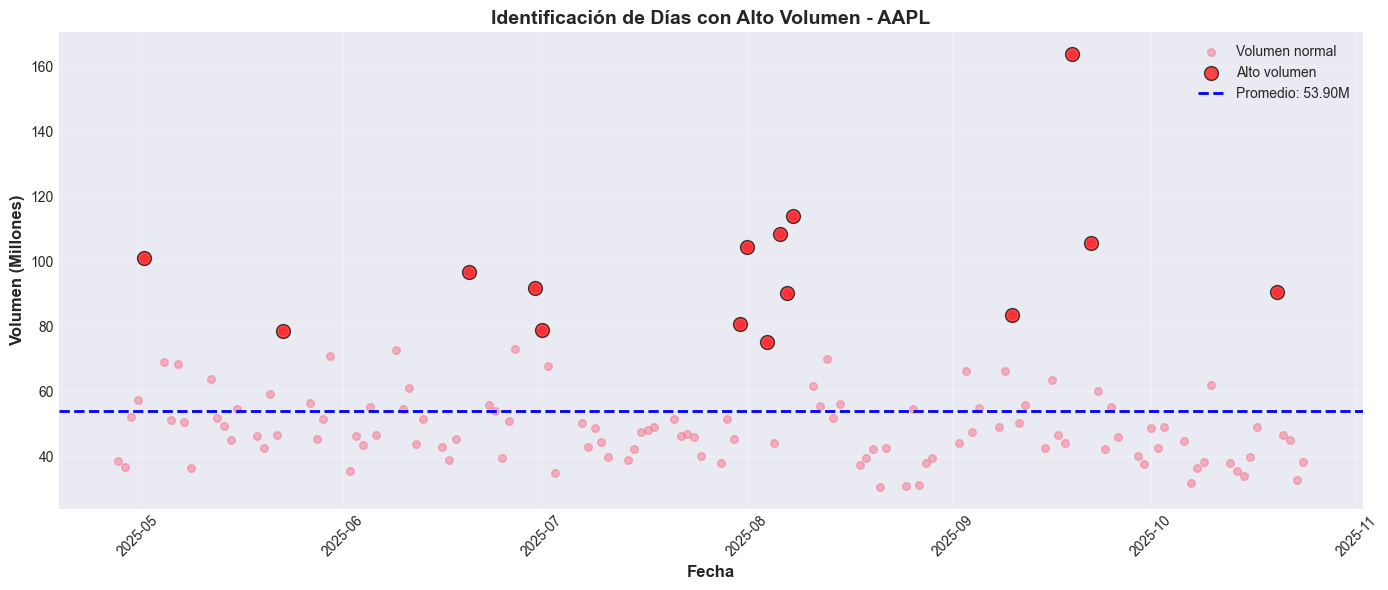

In [10]:
# Identificar días con volumen inusualmente alto
volumen_promedio = datos['Volume'].mean()
volumen_std = datos['Volume'].std()
umbral_alto = volumen_promedio + volumen_std

dias_alto_volumen = datos[datos['Volume'] > umbral_alto].copy()
dias_alto_volumen['Cambio_Precio'] = ((dias_alto_volumen['Close'] - dias_alto_volumen['Open']) 
                                       / dias_alto_volumen['Open'] * 100)

print(f"Días con volumen superior a la media + 1 desviación estándar:")
print(f"Total de días: {len(dias_alto_volumen)}")
print(f"\nTop 5 días con mayor volumen:")
print(dias_alto_volumen.nlargest(5, 'Volume')[['Open', 'Close', 'Volume', 'Cambio_Precio']])

# Visualizar
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(datos.index, datos['Volume']/1e6, alpha=0.5, s=30, label='Volumen normal')
ax.scatter(dias_alto_volumen.index, dias_alto_volumen['Volume']/1e6, 
          color='red', s=100, alpha=0.7, label='Alto volumen', edgecolors='black', linewidth=1)
ax.axhline(y=volumen_promedio/1e6, color='blue', linestyle='--', 
          linewidth=2, label=f'Promedio: {volumen_promedio/1e6:.2f}M')
ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax.set_ylabel('Volumen (Millones)', fontsize=12, fontweight='bold')
ax.set_title(f'Identificación de Días con Alto Volumen - {ticker}', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Conclusiones

**Análisis del gráfico de dispersión Volumen vs Precio:**
- Permite identificar si existe relación entre la actividad de trading (volumen) y el precio de la acción
- Los puntos con colores más claros representan fechas más recientes
- La línea de tendencia muestra la dirección general de la relación

**Otros insights:**
- Los días de alto volumen pueden indicar noticias importantes o eventos significativos
- La correlación nos ayuda a entender si los inversores están más activos cuando el precio es alto o bajo